# Ejemplos de conexion Java a BD SQLite
- Archivos del reto:
  - **bd_estudiantes.db** : base de datos que se debe crear con SQLite
  - **estudiantes.sql** : contiene la instruccion de SQL para crear la base de datos
  - **infoestudiantes.csv** : contiene 15 registros de estudiante con todos sus datos para insertarse en la base de datos

## Descargar sqlite
- Descardar desde: https://www.sqlite.org/download.html
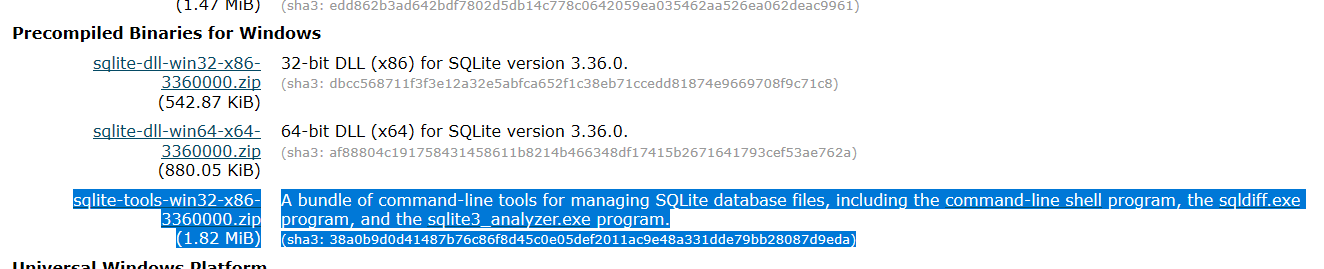

## Crear carpeta de trabajo y copiar archivos
- Crear una carpeta de trabajo "bdatos"
- Copiar el archivo ejecutable "sqlite3.exe" a la carpeta
- Copiar los archivos "estudiantes.sql" y "infoestudiantes.csv" a la carpeta
- Copiar el archivo batch de comandos "crear.bat" a la carpeta

## Creación de la base de datos, la tabla, y la informacion
Dos formas posibles:
1. Puede ejecutar directamente el archivo batch (en windows)
```
   crear.bat
```     
2. Puede ejecutar los comandos de forma individual:
```
   sqlite3 bd_estudiantes.db < estudiantes.sql
```
```
   sqlite3 bd_estudiantes.db -cmd ".mode csv" ".import infoestudiantes.csv estudiantes" ".quit"
```

## Comprobar creación de base de datos, tabla, y de la informacion
- Ejecutar sqlite con el nombre de la base de datos:
```
   sqlite3.exe bd_estudiantes.db
```   
- Ver tablas:
```   
   sqlite> .tables
```   
   
- Enviar consultas:
```
    sqlite> SELECT * FROM estudiantes;
```  
```  
    sqlite> SELECT nombres, programa FROM estudiantes;
```  
- Salir:
```  
  .quit
```  
  

## Ejemplo primero de conexion de BD sqlite desde Java
- Copiar el manejador jdbc de sqlite (archivo .jar) a la carpeta
- Copiar el ejemplo HolaDB.java
- Adecuar la cadena de conexion con la ruta completa de la base de datos
- No necesita usuario ni password

In [2]:
import java.sql.*;

public class HolaDB {
	// Cadena de conexión con la ruta completa
    // static final String BD_URL  = "jdbc:sqlite:c:\documentos\ejemplos\bd_estudiantes.db";
   static final String BD_URL  = "jdbc:sqlite:bd_estudiantes.db";
//   static final String USUARIO = "root";
//   static final String CLAVE   = "root";

   public static void main(String[] args) {
      try {
      	 Class.forName ("org.sqlite.JDBC");
		  // Abre la conexion
		 //Connection conexion = DriverManager.getConnection (BD_URL, USUARIO, CLAVE);
		 Connection conexion = DriverManager.getConnection(BD_URL);
         Statement sentencia = conexion.createStatement();

		 // Crea cadena de consulta
		 String consulta = "SELECT * FROM estudiantes"; 
		 // Envía la consulta para que se ejecute
         ResultSet resultados = sentencia.executeQuery (consulta); 

         // Extract data from result set
         while (resultados.next()) {

			 int id          = resultados.getInt ("id");
			 String nombres  = resultados.getString ("nombres");
			 String programa = resultados.getString ("programa");

			 System.out.println ("ID: " + id + " NOMBRES: " + nombres + " PROG: " + programa);
         }
		 System.out.println ("Hasta pronto!");

      } catch (SQLException e) {
         e.printStackTrace();
      } catch (ClassNotFoundException e) {
      	 e.printStackTrace();
      } 

   }
}

## Compilación/Ejecución desde la línea de comandos
- Compilación normal:
```  
  javac HolaDB.java
```  
  
- Ejecución adicionando el manejador jdbc al classpath
```
  java -classpath .;sqlite-jdbc-3.7.2.jar HolaDB
```

## Compilacion/Ejecución desde netbeans
- Abrir el proyecto HolaDB
- Copiar la base de datos "bd_estudiantes.db" a la raiz del proyecto
- Adicionar el manejador de jdbc para sqlit a librerias -> archivos .jar
- Ejecutar

# Ejemplos en Netbeans
- Adicionar el archivo .jar del jdbc de sqlite al proyecto de netbeans
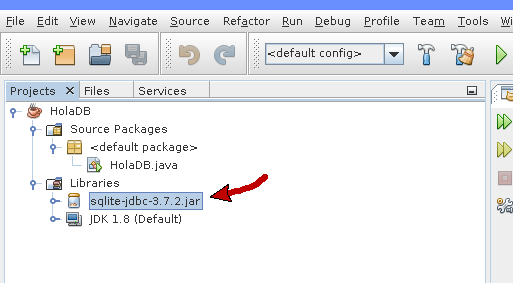


- Actualizar el URL con toda la ruta de la base de datos en el archivo Java donde se conecta a la BD
- Si no quiere colocar la ruta de la BD, copiar la BD en la raíz de la carpeta del proyecto de netbeans.
- Revisar los dos ejemplos:
  - **HolaDB** : probar primero este programa para ver si se conecta a la BD
  - **ProgramaDirectorioDBs** : Este es el ejemplo de estudiante con tres atributos y con la conexión a una BD sqlite : "bd_ejemplo.db".
